In [8]:
import torch
import torchvision
from matplotlib import pyplot as plt

In [5]:
import torchvision

In [9]:
import torchvision.transforms as transforms
from torch.nn import functional as F
import numpy as np

In [8]:
def softmax(z):
    # 每一行做sum
    return torch.exp(z) / torch.sum(torch.exp(z),axis=1).unsqueeze(1)

def cross_entropy_loss(preds,labels):
    return -torch.sum(labels * torch.log(preds)) / len(preds)

def model(X,w):
    return softmax(torch.mm(X,w))

In [10]:
if __name__ == "__main__":
    
    mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True,
                                                    transform=transforms.ToTensor())
    mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True,
                                                   transform=transforms.ToTensor())

    train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=1000, shuffle=True)
    test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=500, shuffle=True)
    
    epochs = 20
    lr = 0.1
    # 初始化权重 输入图片维度 [batch_size, 1, 28, 28]
    w = torch.normal(0, 1, (784, 10))
    w.requires_grad_(requires_grad=True)
    ans = []
    for i in range(epochs):
        for batch in train_loader:
            images, labels = batch
            images = images.squeeze(1).reshape(-1, 784)
            preds = model(images, w)
            labels = F.one_hot(labels, 10)
            # e = loss(preds,labels)
            e = cross_entropy_loss(preds, labels)
            ans.append(e)
            e.backward()
            w.data -= lr * w.grad
            # 清空梯度
            w.grad.data.zero_()
            print("batch erro:" + str(e.item()))

    global correct
    with torch.no_grad():
        correct = 0
        for batch in test_loader:
            images, labels = batch
            images = images.squeeze(1).reshape(-1, 784)
            preds = model(images, w)
            preds = preds.argmax(dim=1)
            correct += (preds == labels).sum()
            print(correct)
    print(correct.item() * 1.0 / len(mnist_test))

    ans2 = []
    for a in ans:
        ans2.append(a.item())

    x = np.arange(1, 1201)
    plt.plot(x, ans2)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

batch erro:15.870409965515137
batch erro:13.729424476623535
batch erro:12.308975219726562
batch erro:12.188072204589844
batch erro:11.024184226989746
batch erro:10.676206588745117
batch erro:9.785172462463379
batch erro:10.195746421813965
batch erro:9.745631217956543
batch erro:9.222471237182617
batch erro:8.644779205322266
batch erro:8.340180397033691
batch erro:8.254734992980957
batch erro:7.811648845672607
batch erro:7.904810428619385
batch erro:7.072168827056885
batch erro:7.813503265380859
batch erro:7.1170148849487305
batch erro:6.934737205505371
batch erro:6.577661991119385
batch erro:6.578645706176758
batch erro:6.379677772521973
batch erro:6.47833776473999
batch erro:6.104607105255127
batch erro:6.000186920166016
batch erro:6.212237358093262
batch erro:5.743592262268066
batch erro:5.734662055969238
batch erro:5.377250671386719
batch erro:5.548910617828369
batch erro:5.64232063293457
batch 

NameError: name 'test_set' is not defined

tensor(351)
tensor(716)
tensor(1082)
tensor(1439)
tensor(1780)
tensor(2142)
tensor(2511)
tensor(2847)
tensor(3187)
tensor(3546)
tensor(3894)
tensor(4234)
tensor(4595)
tensor(4932)
tensor(5285)
tensor(5637)
tensor(5998)
tensor(6335)
tensor(6699)
tensor(7056)
0.7056


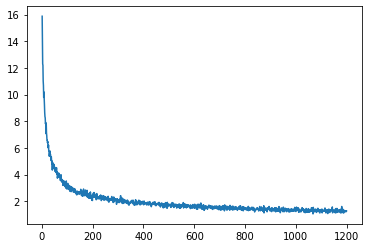

In [13]:
    global correct
    with torch.no_grad():
        correct = 0
        for batch in test_loader:
            images, labels = batch
            images = images.squeeze(1).reshape(-1, 784)
            preds = model(images, w)
            preds = preds.argmax(dim=1)
            correct += (preds == labels).sum()
            print(correct)
    print(correct.item() * 1.0 / len(mnist_test))

    ans2 = []
    for a in ans:
        ans2.append(a.item())

    x = np.arange(1, 1201)
    plt.plot(x, ans2)